In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print
from functools import reduce

from explore.gcp.storage import gcp
from explore.src.preprocess import Cleaning
from explore.src.visualisation import Plots
from explore.src.explore import describe_data

import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = gcp.read_df_from_bucket(bucket_name="fbref_db", blob_name="shooting.csv")

[01/29/24 20:13:46] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=637864;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=618680;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[01/29/24 20:13:47] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=240645;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=990244;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [4]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per_90,shots_on_target_per_90,goals_per_shot,goals_per_shot_on_target,avg_shot_distance,free_kick_shots,penalty_kicks,penalty_kicks_attempted,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg,season
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,24.3,5,33.0,11,33.3,1.36,0.45,0.15,0.45,23.4,4.0,0,0,3.1,3.1,0.09,1.9,1.9,2017-2018
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,1.5,0,2.0,0,0.0,1.29,0.00,0.00,NaN,19.9,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,2017-2018
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,5.7,0,3.0,0,0.0,0.52,0.00,0.00,NaN,17.4,0.0,0,0,0.2,0.2,0.05,-0.2,-0.2,2017-2018
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,11.7,1,4.0,2,50.0,0.34,0.17,0.25,0.50,17.1,0.0,0,0,0.2,0.2,0.04,0.8,0.8,2017-2018
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,5.5,0,2.0,1,50.0,0.36,0.18,0.00,0.00,11.5,0.0,0,0,0.1,0.1,0.06,-0.1,-0.1,2017-2018


In [5]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,2920,1.0,2920.00,1366.00,1371.01,796.36,0,0.00
age,float64,3,0.02,29,14.0,42.00,25.00,25.34,4.53,19,0.10
born,float64,3,0.02,32,1977.0,2008.00,1995.00,1994.35,4.92,38,0.20
90s,float64,0,0.00,381,0.0,38.00,11.80,13.44,10.64,0,0.00
goals,int64,0,0.00,38,0.0,41.00,0.00,1.65,3.17,1635,8.55
shots,float64,3,0.02,151,0.0,195.00,8.00,15.13,19.67,1267,6.63
shots_on_target,int64,0,0.00,71,0.0,91.00,2.00,5.03,7.63,1356,7.09
shots_on_target_pct,float64,3464,18.12,445,0.0,100.00,30.00,29.94,20.80,521,2.72
shots_per_90,float64,3,0.02,573,0.0,180.00,0.82,1.24,2.07,500,2.61
shots_on_target_per_90,float64,0,0.00,298,0.0,30.00,0.19,0.39,0.76,702,3.67


In [6]:
df = Cleaning(df).pipeline()
df.head()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB',

,rk,player,nation,pos,squad,comp,age,born,90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per_90,shots_on_target_per_90,goals_per_shot,goals_per_shot_on_target,avg_shot_distance,free_kick_shots,penalty_kicks,penalty_kicks_attempted,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg,season,general_pos,age_range,country,continent
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,24.3,5,33.0,11,33.3,1.36,0.45,0.15,0.45,23.4,4.0,0,0,3.1,3.1,0.09,1.9,1.9,2017-2018,Defender,25-29,Netherlands,Europe
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,1.5,0,2.0,0,0.0,1.29,0.00,0.00,NaN,19.9,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,2017-2018,Midfielder,20-24,England,Europe
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,5.7,0,3.0,0,0.0,0.52,0.00,0.00,NaN,17.4,0.0,0,0,0.2,0.2,0.05,-0.2,-0.2,2017-2018,Midfielder,20-24,England,Europe
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,11.7,1,4.0,2,50.0,0.34,0.17,0.25,0.50,17.1,0.0,0,0,0.2,0.2,0.04,0.8,0.8,2017-2018,Defender,30-34,Italy,Europe
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,5.5,0,2.0,1,50.0,0.36,0.18,0.00,0.00,11.5,0.0,0,0,0.1,0.1,0.06,-0.1,-0.1,2017-2018,Defender,25-29,Tunisia,Africa


## Striker Analysis

In [12]:
positions = ["Forward"]

# filter by position and minimum 20 90s
dff = df.loc[(df["general_pos"].isin(positions)) & (df["90s"] >= 20)]

In [9]:
describe_data(dff)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,1828,1.00,2917.00,1387.00,1400.43,795.21,0,0.00
age,float64,0,0.00,24,16.00,39.00,26.00,25.89,3.79,1,0.04
born,float64,0,0.00,24,1981.00,2004.00,1994.00,1993.23,4.11,0,0.00
90s,float64,0,0.00,177,20.00,38.00,26.40,26.79,4.45,0,0.00
goals,int64,0,0.00,38,0.00,41.00,4.00,5.83,5.64,115,4.27
shots,float64,0,0.00,150,1.00,195.00,42.00,46.69,27.24,62,2.30
shots_on_target,int64,0,0.00,71,0.00,91.00,14.00,16.34,11.97,48,1.78
shots_on_target_pct,float64,0,0.00,387,0.00,100.00,33.30,32.60,10.84,31,1.15
shots_per_90,float64,0,0.00,413,0.04,6.85,1.64,1.74,0.94,23,0.85
shots_on_target_per_90,float64,0,0.00,194,0.00,2.84,0.53,0.61,0.42,28,1.04


## Player Insights

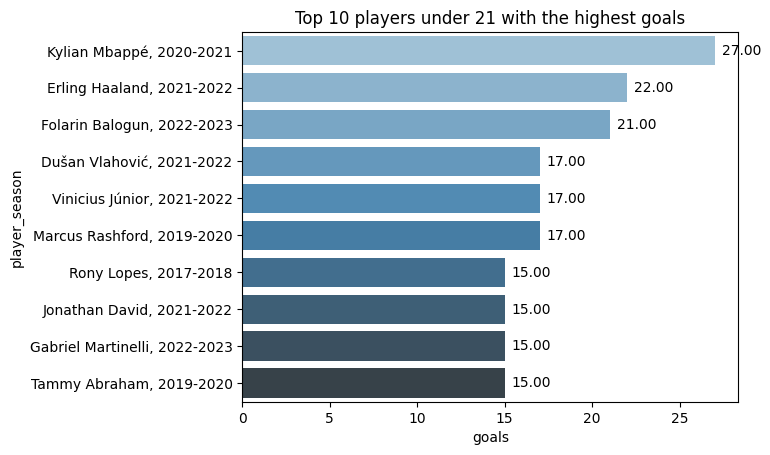

In [66]:
def create_bar_plot(df: pd.DataFrame, stat: str, age: str) -> None:
    filtered = (
        df.loc[df["age"] == age]
        .sort_values(by=stat, ascending=False)
        .head(10)
    )
    filtered["player_season"] = filtered["player"] + ", " + filtered["season"]
    plots = sns.barplot(data=filtered, x=stat, y="player_season", palette="Blues_d")
    for bar in plots.patches:
        plots.annotate(
            format(bar.get_width(), ".2f"),
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            ha="left",
            va="center",
            size=10,
            xytext=(5, 0),
            textcoords="offset points",
        )
    plt.title(f"Top 10 players under {age} with the highest {stat}")
    plt.show()
    
create_bar_plot(dff, "goals", 21)

## Country Insights

In [22]:
def goal_stats(df: pd.DataFrame, groupby: str, sort_by: str):
    return (
        df.groupby(groupby)[
            [
                "goals",
                "xg",
                "non_penalty_xg",
                "non_penalty_xg_per_shot",
                "goals_minus_xg",
                "non_penalty_goals_minus_xg",
            ]
        ]
        .mean()
        .reset_index()
        .sort_values(sort_by, ascending=False)
    )
    
goal_stats(dff, "age", 'non_penalty_goals_minus_xg')

,age,goals,xg,non_penalty_xg,non_penalty_xg_per_shot,goals_minus_xg,non_penalty_goals_minus_xg
22,39.0,10.000000,6.400000,5.600000,0.120000,3.600000,4.400000
14,31.0,12.704545,11.554545,9.486364,0.133182,1.150000,1.059091
16,33.0,14.833333,14.188889,11.783333,0.145000,0.644444,0.938889
13,30.0,12.192982,11.549123,9.668421,0.130702,0.643860,0.735088
8,25.0,9.478261,8.771739,7.665217,0.125217,0.706522,0.693478
7,24.0,9.953271,9.327103,8.446729,0.121682,0.616822,0.665421
2,19.0,9.470588,8.847059,8.376471,0.125882,0.623529,0.564706
12,29.0,10.637681,10.060870,8.427536,0.127391,0.576812,0.500000
11,28.0,10.866667,10.242667,8.782667,0.135067,0.624000,0.484000
4,21.0,9.553846,9.050769,8.116923,0.123538,0.503077,0.467692


## Relationship between Goals and Related Stats

In [19]:
dff_plots = Plots(dff)

Plot goals vs relevant goal scoring variables

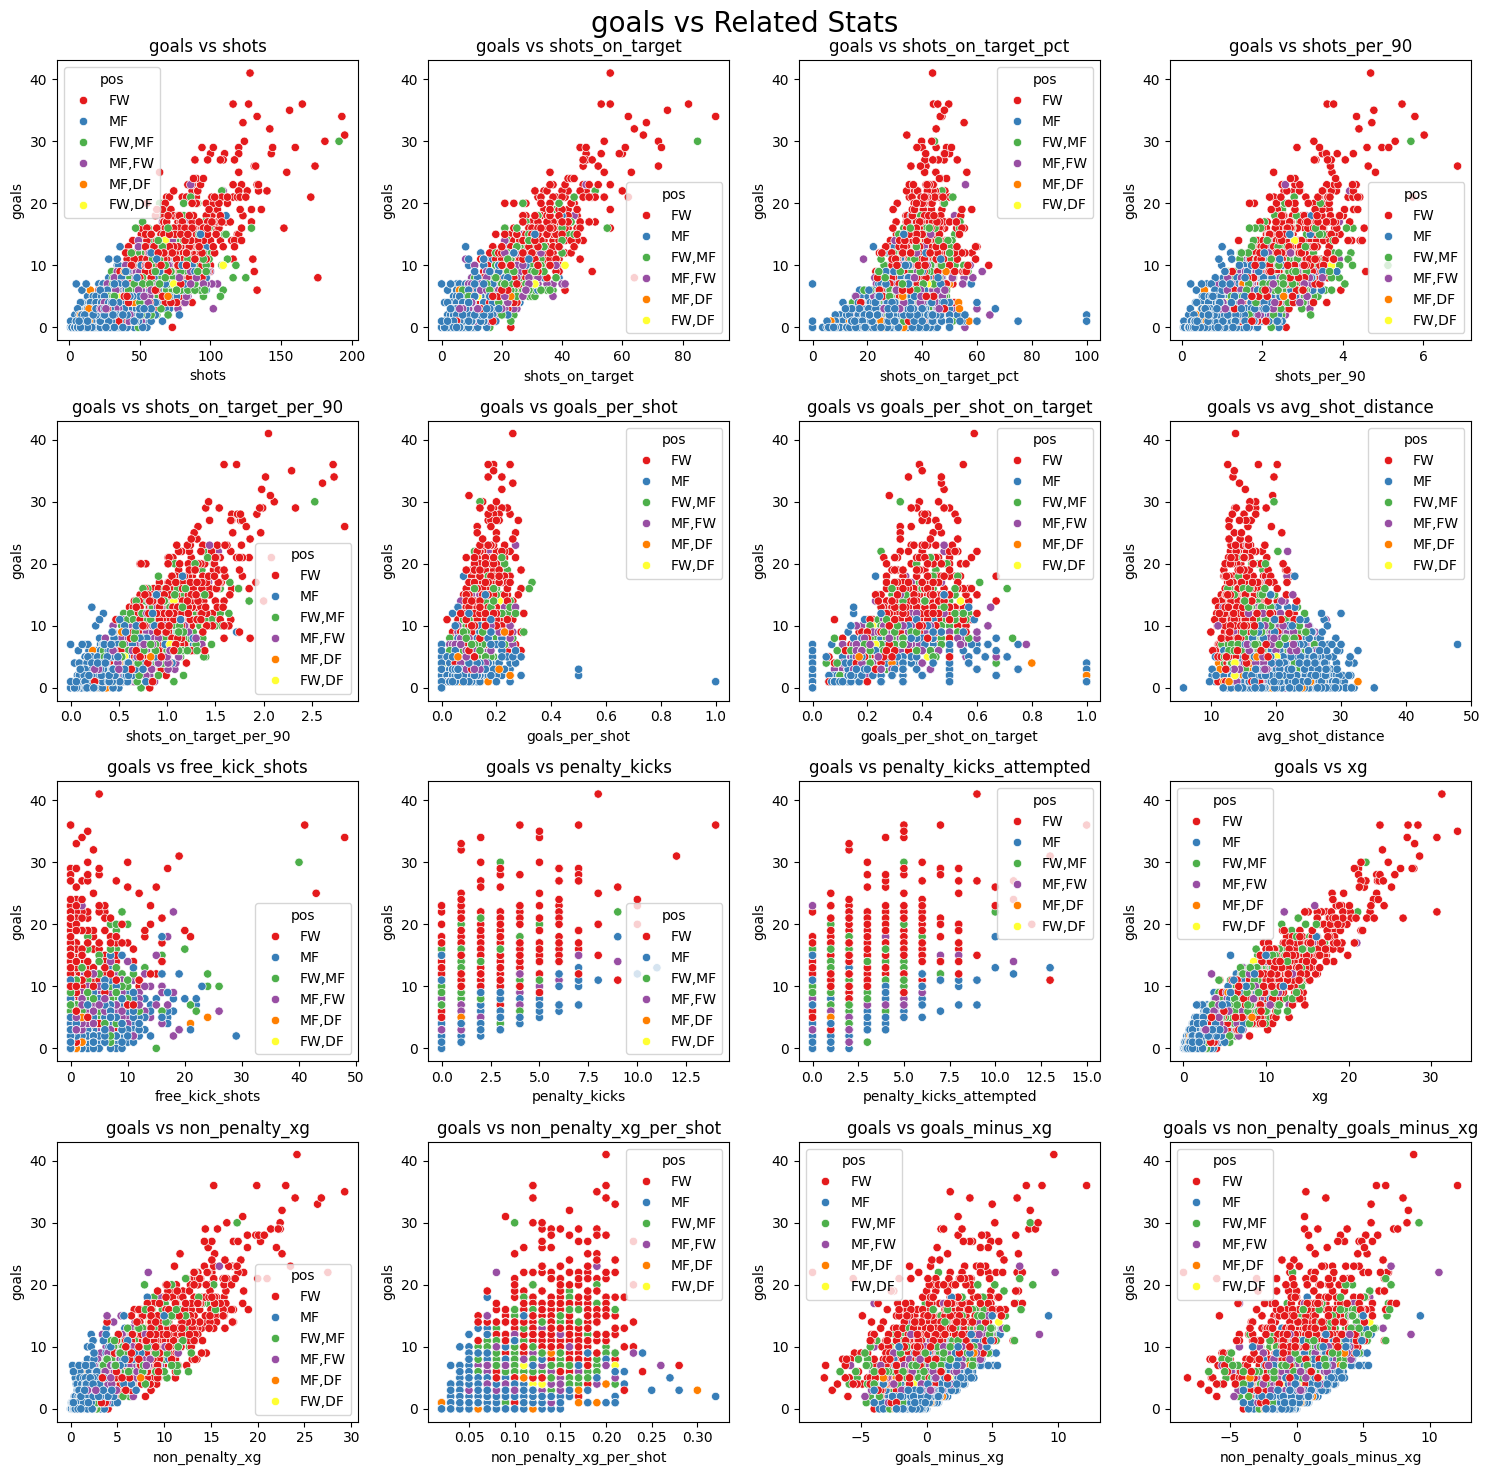

In [21]:
columns = dff.columns[10:-2].tolist()
dff_plots.relationships(y="goals", X=columns, hue="pos", palette="Set1")

## Correlation Analysis


In [25]:
dff_plots.correlation_matrix()

TypeError: Plots.correlation_matrix() missing 1 required positional argument: 'save_to'

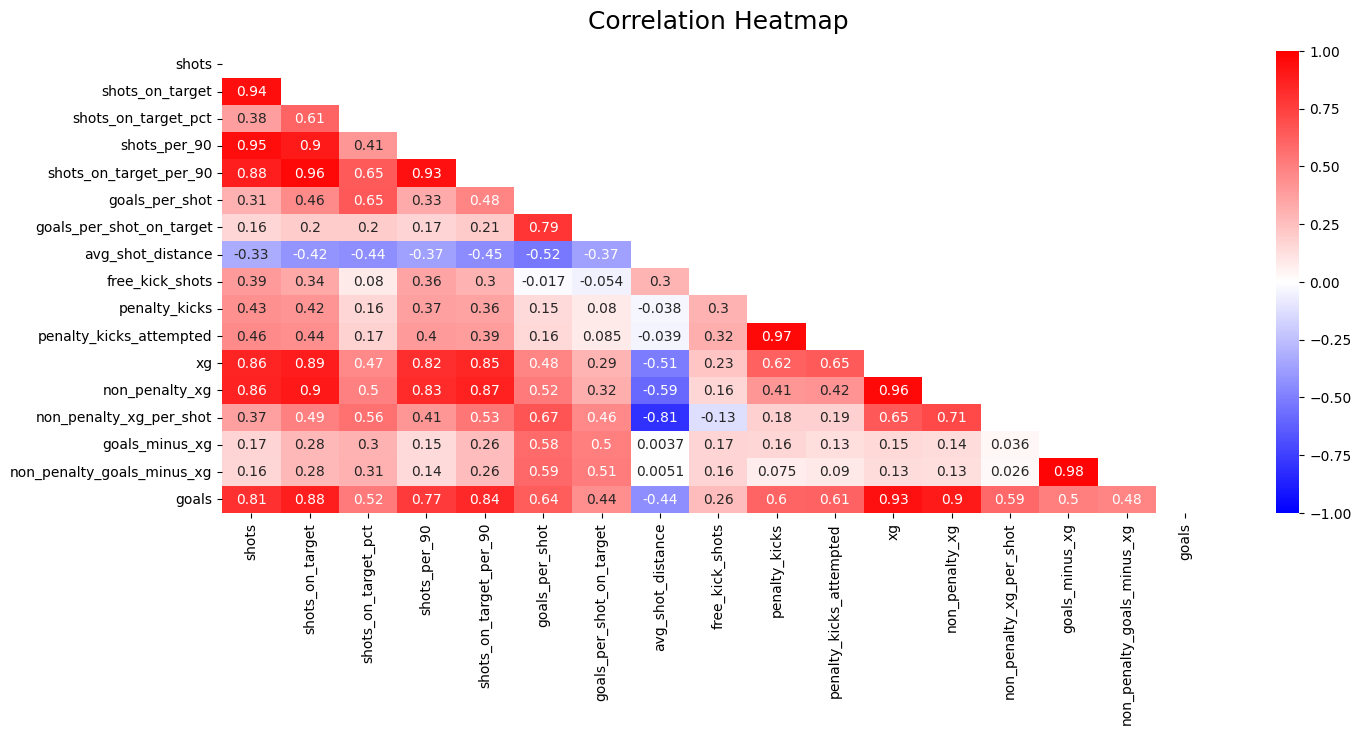

In [62]:
def correlation_martix(df: pd.DataFrame) -> None:
    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))
    heatmap = sns.heatmap(
        df.corr(numeric_only=True),
        mask=mask,
        vmin=-1,
        vmax=1,
        annot=True,
        cmap="bwr",
    )
    heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 18}, pad=16)
    plt.show()


df = dff[y_vars + ["goals"]]
correlation_martix(df)

Correlation between dependent and independent variables


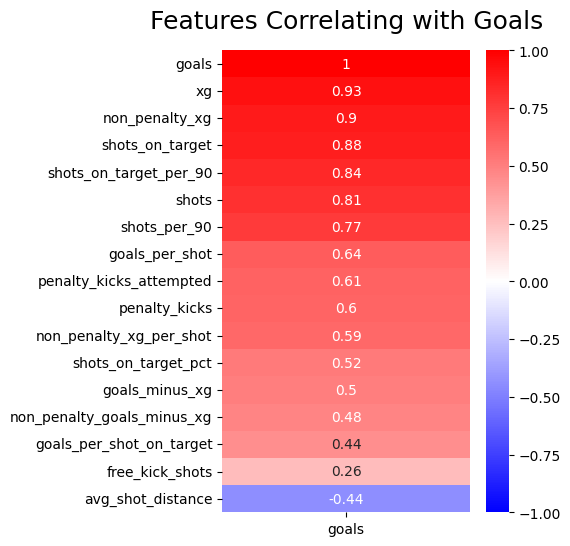

In [63]:
def dependent_correlations(df: pd.DataFrame, dependent_var: str) -> None:

    plt.figure(figsize=(4, 6))
    heatmap = sns.heatmap(
        df.corr()[[dependent_var]].sort_values(by=dependent_var, ascending=False),
        vmin=-1,
        vmax=1,
        annot=True,
        cmap="bwr",
    )
    heatmap.set_title(
        f"Features Correlating with {dependent_var.capitalize()}", fontdict={"fontsize": 18}, pad=16
    )
    plt.show()
    
dependent_correlations(df, "goals")
    